<a href="https://colab.research.google.com/github/taesangeom/SK-T-Academy/blob/main/DL/03_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# GPU는 무조건 세팅을 하고 T4라도 하고 진행을 해야함!!!!!

In [ ]:
# VGG 논문
https://arxiv.org/pdf/1409.1556

In [ ]:
import tensorflow as tf

In [ ]:
# 3차원의 이미지를 대상으로 CNN 구조를 만들 때!!!
# ==> 집중의 대상을 2차원으로 하려고 할 때!!!!!!
#     ( 채널의 수는 니가 알아서 좀 연동을 해줘!!!!!)

In [ ]:
# 1) conv2D 레이어 : ==> 3차원의 채널은 내가 신경안 쓸께!!!!
# - kernel_size : 필터/커널에 대한 사이즈 2D
#                 3*3, 5*5, 7*7,
#                 ++ 채널은 입력에 따라서 코드가 알아서 해주세요!!!
# - filters : 몇 개의 커널/필터를 사용할지....
#           : 몇 장의 FM을 쌓을것인가!!!!!!
#           : output으로 나오는 FM의 Channel의 수!!!!
# ---------------------
# - stride : 가로 step, 세로 step : 스캔의 디테일을 정하게 됨!!!
#          : FM의 W/H에 대한 size가 연동!!
# - padding : 테두리에 대해서 처리
#     valid : 그냥 테두리 사용하지 말고 그냥 해줘!!!
#     same  : 입력으로 들어오는 것과 동일한 크기WH로 FM의 크기를 보존해줘!!!!
# ----------------------
# ++ AF:cnn초기 논문/모델들은 거의 사용X
#       vgg 논문 부터는 주로 사용을 함!!!!!

In [ ]:
conv1 = tf.keras.layers.Conv2D(
    # 우리가 신경 쓸 부분은 오로지 2D
    # 나머지 channel은 니가 알아서 해줘!!!!
    kernel_size = ( 5,5),
    filters = 4,
    strides = (2,2),
    padding = "same"
    # +++ activation
)

TypeError: Conv2D.__init__() missing 2 required positional arguments: 'filters' and 'kernel_size'

In [ ]:
#### Fashion-MNIST  DNN 설계 스타일로 여러번 실험!!!!
# ===> 설계 방식을 CNN을 기본을 해보자!!!

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_y), ( test_X, test_y) = fashion_mnist.load_data()
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# 전처리
train_X = train_X /255.0
test_X  = test_X / 255.0

In [ ]:
# ==> 간단하게 하기 위해서 보통 흑백 이미지를 사용을 함!!!
#     단점은 색상이 중요한 경우에는 이 중요한 정보를 소실!!!!!
# ==> 이미지 처리를 해야하면,,opencv + 이미지 처리 패키지를

In [ ]:
# 1. 입력에 대한 데이터 처리!!!!
# ==> 1장에 대해서 중심으로 바라봐야 함!!!!
#     n장에 대해서는 TF/Torch 알아서 처리!!!!
# ==> 1장에 대해서 신경을 쓰면 됨!!!!!

In [ ]:
train_X.shape # 3D

(60000, 28, 28)

In [ ]:
train_X[0].shape # 2D

(28, 28)

In [ ]:
# 코드의 주된 흐름은 일반적인 컬러이미지를 가정하고 진행을 하려고 함!!!
# ==> 1장 입력 데이터의 차원은 3D
# ==> conv 하는 과정에서 channel은 신경 안 쓰고 : Conv2D
# ==> To Do List
#     1. 1장에 데이터의 차원을 2D --> 3D로 변경!!!!!!( 채널은 신경X)
#        now : (28, 28) 2D
#        pred : (28,28,1) 3D
#     2. 전체 데이터셋을 3D --------> 4D으로 변경!!!!!
#        now : (60000, 28,28) 3D
#        pred : (60000, 28,28,1) 4D
# ===> 데이터 셋의 모양/차원을 변경을 해야함!!!!!!!
#      주의!!! 채널은 뒤로 돌림!!!!!(28,28,1) , (1,28,28) 메뉴얼!!!
#      (데이터의 수, 가로, 세로, 채널) : Conv2D로 사용이 가능함!!

In [ ]:
print(train_X.shape)
print(train_X[0].shape)
#train_X = train_X.reshape(60000, 28, 28,1)
train_X = train_X.reshape(-1, 28, 28,1) # 3d -- >4d
test_X = test_X.reshape(-1, 28,28,1)
print(train_X.shape)
print(train_X[0].shape)

(60000, 28, 28)
(28, 28)
(60000, 28, 28, 1)
(28, 28, 1)


In [ ]:
# ==> 데이터/ 데이터셋에 대한 차원과 모양은 본인이 설계하는
#     네트워크의 구조에 따라서 자유롭게 변형을 할 수 있어야 함!!!

In [ ]:
### 가장 간단한 CNN을 만들어 보겠습니다.
model = tf.keras.Sequential(
    [
        # step1) 입력 이미지 + 특징 추출 : Conv
        # 입력 : 1장 데이터 ---> 28,28,1  // 60000,28,28,1
        # + conv1
        tf.keras.layers.Conv2D( input_shape=(28,28,1),
                               kernel_size=(3,3), filters=16),
        tf.keras.layers.Conv2D( kernel_size=(3,3), filters=32),
        tf.keras.layers.Conv2D( kernel_size=(3,3), filters=64),
        # ===> 이미지가 가진 주된 특징을 잘 뽑았다고 가정!!!
        # ------------------- FM 추출

        # 분류에 대한 네트워크!!!
        tf.keras.layers.Flatten(), # 3D ---> 1D
        # 분류를 위한 HL : Dense....
        tf.keras.layers.Dense( units = 128, activation="relu"),
        # .......추가할 수 있겠죠...

        # 출력!!!!
        tf.keras.layers.Dense( units = 10, activation="softmax")

    ]
)
model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,642 (15.22 MB)

 Trainable params: 3,989,642 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
(3*3*1 + 1) * 16

160

In [ ]:
(3*3*16 + 1) * 32

4640

In [ ]:
# 잠시 쉬었다가 보겠습니다!!!!

In [ ]:
train_y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
model.compile(
    # 정답을 있는 라벨인코딩값을 그대로 사용 : loss --> sparse
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
history = model.fit(
    train_X, train_y,
    # ===> 굳이 to_categorical()사용을 안 한 이유 : loss에서 처리!!!!
    epochs = 20,
    validation_split = 0.25,
    batch_size = 128
)

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7618 - loss: 0.6765 - val_accuracy: 0.8635 - val_loss: 0.3827
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8766 - loss: 0.3415 - val_accuracy: 0.8705 - val_loss: 0.3607
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8990 - loss: 0.2774 - val_accuracy: 0.8762 - val_loss: 0.3456
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9170 - loss: 0.2282 - val_accuracy: 0.8767 - val_loss: 0.3745
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9301 - loss: 0.1917 - val_accuracy: 0.8693 - val_loss: 0.3973
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9392 - loss: 0.1684 - val_accuracy: 0.8731 - val_loss: 0.4177
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9477 - loss: 0.1395 - val_accuracy: 0.8648 - val_loss: 0.4830
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9525 - loss: 0.1251 - val_accuracy: 

In [ ]:
# 정확한 상황은 다를 수있지만,,
# ==> 거의 overfit 걸린 것을 볼 수 있음!!!!!!
# ==> conv : stride
#     pool : 대표화!!
# +++ DNN : dropout
#------------- OF을 좀 피해볼까.. 모델의 복잡도를 좀 낮추자!!!
# 초기 cnn 논문 : c - p - c- p etc
#      vgg 논문 : c-c-p, c-c-c-p etc

In [ ]:
# 시도1) cnn 초기 버전을 참조!!!!!
### 가장 간단한 CNN을 만들어 보겠습니다.
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D( input_shape=(28,28,1), kernel_size=(3,3), filters=16),
        tf.keras.layers.MaxPooling2D( pool_size=(2,2), strides=(2,2)),
        tf.keras.layers.Conv2D( kernel_size=(3,3), filters=32),
        tf.keras.layers.MaxPooling2D( pool_size=(2,2), strides=(2,2)),
        tf.keras.layers.Conv2D( kernel_size=(3,3), filters=64),

        tf.keras.layers.Flatten(), # 3D ---> 1D
        tf.keras.layers.Dropout(rate = 0.2),
        tf.keras.layers.Dense( units = 128, activation="relu"),
        tf.keras.layers.Dropout(rate = 0.2),
        tf.keras.layers.Dense( units = 10, activation="softmax")

    ]
)
model

<Sequential name=sequential_3, built=True>

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 3, 3, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,442 (384.54 KB)

 Trainable params: 98,442 (384.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 이거 그러면 어떤 조합이 best냐!!!!!!!
# ==> 실험!!!!! + optuna etc

In [ ]:

model.compile(
    # 정답을 있는 라벨인코딩값을 그대로 사용 : loss --> sparse
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)
history = model.fit(
    train_X, train_y,
    # ===> 굳이 to_categorical()사용을 안 한 이유 : loss에서 처리!!!!
    epochs = 20,
    validation_split = 0.25,
    batch_size = 128
)


Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6750 - loss: 0.9104 - val_accuracy: 0.8361 - val_loss: 0.4485
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8354 - loss: 0.4560 - val_accuracy: 0.8605 - val_loss: 0.3767
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8601 - loss: 0.3829 - val_accuracy: 0.8639 - val_loss: 0.3646
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8704 - loss: 0.3557 - val_accuracy: 0.8754 - val_loss: 0.3338
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8803 - loss: 0.3287 - val_accuracy: 0.8847 - val_loss: 0.3171
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8861 - loss: 0.3119 - val_accuracy: 0.8883 - val_loss: 0.3071
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8928 - loss: 0.2935 - val_accuracy: 0.8898 - val_loss: 0.2997
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8958 - loss: 0.2826 - val_accuracy: 0

In [ ]:
### 모델링에서 중요한 기본적인 부분 : Bais - Variance!!!!
#   underFit ~~~  적당한 Fit   ~~~~ overFIt

# 기존 ml : hpt 중심으로 해당하는 모델의 성능/파라미터!!!
#           max_depth ,,,.
# DL      : 모델의 구조를 통해서 조절!!!!!
#           연결성을 중심으로 조절!!! 구조중심으로 !!!

In [ ]:
# ==> 모델을 조금 경량화를 했더니..학습이 전 보다 잘 된다...
# ++ 더 학습을 해봐도( epoch를 더 늘려봐도,,,)
# ++ epohc를 더 걸게 되면,, 마지막 EP : OF
# ===> 중간에 모델들을 저장!!!!!! callback!!!!!!!
# ++ 중간에 모델을 저장 & ES

In [ ]:
import os

In [ ]:
# --> epochs를 일단 크게 세팅을 하고,,,
#     ES : 더 이상 성능 개선이 없으면 중지!!!!!
#     중간중간 weights 저장!!!(모델)

In [ ]:
cp_path ="training/cp-{epoch:04d}.weights.h5"
cp_dir = os.path.dirname(cp_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    cp_path,
    verbose= 1,
    save_weights_only=True
)
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience = 10,
)
history = model.fit(
    train_X, train_y,
    # ===> 굳이 to_categorical()사용을 안 한 이유 : loss에서 처리!!!!
    epochs = 200,
    validation_split = 0.25,
    batch_size = 128,
    # +++ callback
    callbacks = [cp_callback,es_callback ]
)

Epoch 1/200
338/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9282 - loss: 0.1909
Epoch 1: saving model to training/cp-0001.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9282 - loss: 0.1910 - val_accuracy: 0.9023 - val_loss: 0.2781
Epoch 2/200
337/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9297 - loss: 0.1888
Epoch 2: saving model to training/cp-0002.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9296 - loss: 0.1888 - val_accuracy: 0.9019 - val_loss: 0.2961
Epoch 3/200
338/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9292 - loss: 0.1883
Epoch 3: saving model to training/cp-0003.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9292 - loss: 0.1883 - val_accuracy: 0.9053 - val_loss: 0.2818
Epoch 4/200
336/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9304 - loss: 0.1812
Epoch 4: saving model to training/cp-0004.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9304 - loss: 0.1813 - val_accuracy

In [ ]:
# 참고) 위의 코드는 처음 epoch 20을 돌고 나서 200번을 시도!!
#     ===> 시작점이 앞에서와 다르게 높이 시작을 함!!!!

In [ ]:
model # --> 맨 마지막 eopoch의 w!!!
model.evaluate(test_X, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9051 - loss: 0.3146


[0.30805540084838867, 0.9028000235557556]

In [ ]:
# 지나온 eopoch 에 있던 모델을 가지고 평가!!/사용!!!
load_cp_weights= "training/cp-0003.weights.h5"

# 모델의 굴조 : model변수!!!!!!!
model.load_weights(load_cp_weights )

# epoch 3인 모델을 불러와서 평가!!!
model.evaluate(test_X, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9010 - loss: 0.2992


[0.29420435428619385, 0.9014999866485596]

In [ ]:
### ===> DNN으로는 0.87~0.88~0.89
###      CNN설계   0.9X...

# 최적화 방법중 1.
### +++ 최적화를 하고 싶다!!!!! 구조에 대한 최적화!!!
#       : 필터의 수, 필터의 사이즈,
#       : c, p 레이어의 수,,,etc
#       : optua 실험을 할 수 있지만,,,,시간!!!!!비용!!!!
#       ===> 다음에 체크!!!!

In [ ]:
# 대안1
# --> 논문, 다른 사람의 리포트,,,,,
# --> 잘 되는 모델의 구조, 설계 방식을 사전 조사!!!!
#     ++ 데이터 보강!!!!

# 대안2
# ==> 잘 되는 모델 가져다고 사용하자!!!! + 튜닝!!!!

In [ ]:
# +++ CNN ----> VGG  ----> etc
# cnn : (Conv+ Pool)
# vgg : (Conv+Conv+Pool) or (Conv-Conv-Conv-Pool)

In [ ]:
# VGG선형 연구 결과를 참조

<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16.png">

In [ ]:
https://arxiv.org/pdf/1409.1556

In [ ]:
# --> 의의 : c-p구조 대신에 ccp, cccp  구조도 괜찮아1!!
#            성능 기존 대비 잘 나오더라....

In [ ]:
# 의의 : 작은 conv을 가지고 DNN처럼 CNN을 Deep하게 해보자!!!!
#       ==> deep(16~19 Layer)
#       ==> 실제 이미지분류에 대한 대회에 참가했더니 우수했다!!!!
# *** Conv에 대한 layer로 Deep하게 하고 싶다!!!!

In [ ]:
# paper 2.1 Architecture
# 224 * 224 * RGB : input( 224,224, 3)

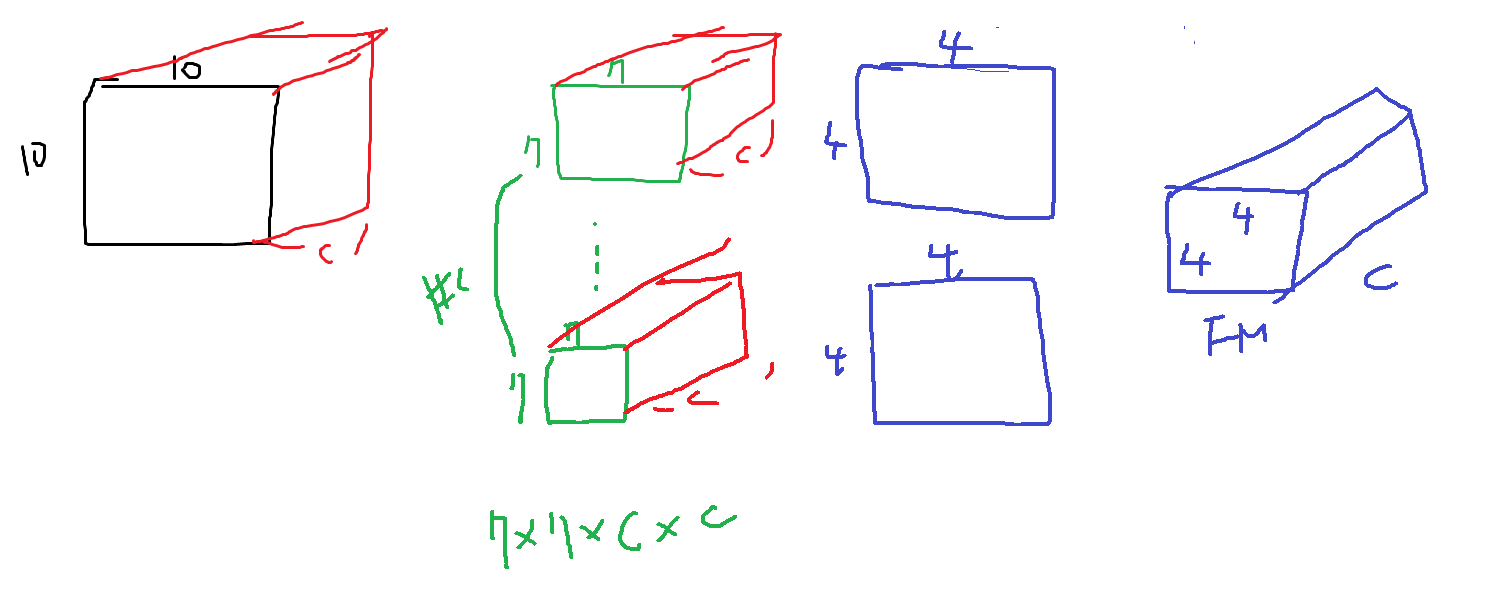

In [ ]:
# ===> 3 by 3 작은 conv을 여러번 돌려가면서 동일한 FeatureMap을 얻을려고 하는데..
#      결과물은 같은데,,,,연산을 해보면,,,,
#      conv (3*3) X 3 경우라고 하며나,,, ( 3*3*C*C)* 3
# ===> 필요한 파라미터의 수를 비교
#      7 by 7 : 7 * 7 * C * C
#      (3by3)*3 : (3*3*C*C)*3
# ===> 27 / 49 ~~ 1/2
# ===> 결론 : 동일한 FM을 추출하는 과정에서,,,
#             conv의 사이즈에 대해서 줄이면 (3)
#             conv레이어를 더 많이 통과해도 된다!! (3개 )
#             but 연산량 : 1번 하는 것 보다 연산량이 줄더라!!!
#     제안 : conv(3*3) -conv(3*3) // - conv(3*3) -- pooling!!!!
# +++ conv에 대한 층을 16~~19층 등등 쌓아도 되더라!!!!!!!
# ===> 공헌 : 이미지에 대한 특징 추출 네트워크
#             기존에 DNN처럼 Deep하게 특징들을 추출을 해도
#             모델의 크기가 아주 커지지 않을 수 있다!!!
#             : conv 필터를 어찌해서 효율성!!!
#             : deep 진짜 해보자!!!!
#             ===> inception v1~v3/4

In [ ]:
# 코드가 조금 길어지니까...모듈을 간단히 불러오겠습니다.
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [ ]:
# 시도 : 기본적인 VGG 설계 방식을 차용!!!!
# but : 입력 데이터의 모양이 다름!!!!
#       논문 : 224,224, 3
#       나의 데이터 : 28, 28 --> 28, 28, 1

In [ ]:
model_vgg_org = tf.keras.Sequential(
    [
        # 원본 입력을 기준으로 설계 : 224 224 RGB --> (224,224,3)
        Conv2D( input_shape=(224,224,3), kernel_size=(3,3),
               filters = 64, padding="same", activation="relu"),
        Conv2D(  kernel_size=(3,3),
               filters = 64, padding="same", activation="relu"),
        MaxPool2D( pool_size=(2,2), strides=(2,2)),

        Conv2D(  kernel_size=(3,3),
               filters = 128, padding="same", activation="relu"),
        Conv2D(  kernel_size=(3,3),
               filters = 128, padding="same", activation="relu"),
        MaxPool2D( pool_size=(2,2), strides=(2,2)),

        Conv2D(  kernel_size=(3,3),
               filters = 256, padding="same", activation="relu"),
        Conv2D(  kernel_size=(3,3),
               filters = 256, padding="same", activation="relu"),
        Conv2D(  kernel_size=(3,3),
               filters = 256, padding="same", activation="relu"),
        MaxPool2D( pool_size=(2,2), strides=(2,2)),

        Conv2D(  kernel_size=(3,3),
               filters = 512, padding="same", activation="relu"),
        Conv2D(  kernel_size=(3,3),
               filters = 512, padding="same", activation="relu"),
        Conv2D(  kernel_size=(3,3),
               filters = 512, padding="same", activation="relu"),
        MaxPool2D( pool_size=(2,2), strides=(2,2)),

        Conv2D(  kernel_size=(3,3),
               filters = 512, padding="same", activation="relu"),
        Conv2D(  kernel_size=(3,3),
               filters = 512, padding="same", activation="relu"),
        Conv2D(  kernel_size=(3,3),
               filters = 512, padding="same", activation="relu"),
        MaxPool2D( pool_size=(2,2), strides=(2,2)),
        ##====> 기본적인 이미지가 가지고 있는 특징 추출!!!!

        # 분류를 위한 NN
        # 1) 특징 추출 네트워크와 분류 네트워크 연결 : Flatten
        Flatten(),
        # 2) 분류를 위한 HL
        Dense( units = 4096, activation="relu"),
        Dense( units = 4096, activation="relu"),
        # 3) 출력용으로 대회가 1000가지 분류.,...
        Dense( units = 1000, activation="softmax"),
    ]
)
model_vgg_org

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential_1, built=True>

In [ ]:
model_vgg_org.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ===> vgg 16 D모델의 경우에는 1억 4천만개의 파라미터들을 최적화!!!!

In [ ]:
### 우리의 목적 : FashinMNIST 분류!!!
#  224 * 224 * 3 ===> 28 * 28 * 1
#  +++ MP : FM의 W/H가 1/2
# 28 --> MP ---> 14 --> MP --> 7 ---> MP 3.5??? --> MP //////////
# 내 데이터에서 ,,,너무 깊게 하면,,,좀...........

In [ ]:
model_vgg_fashion = tf.keras.Sequential(
    [
        # 원본 입력을 기준으로 설계 : 224 224 RGB --> (224,224,3)
        # ==> 28 , 28 , 1
        Conv2D( input_shape=(28,28,1), kernel_size=(3,3),
               filters = 64, padding="same", activation="relu"),
        Conv2D(  kernel_size=(3,3),
               filters = 64, padding="same", activation="relu"),
        MaxPool2D( pool_size=(2,2), strides=(2,2)),

        Conv2D(  kernel_size=(3,3),
               filters = 128, padding="same", activation="relu"),
        Conv2D(  kernel_size=(3,3),
               filters = 128, padding="same", activation="relu"),
        MaxPool2D( pool_size=(2,2), strides=(2,2)),

        Conv2D(  kernel_size=(3,3),
               filters = 256, padding="same", activation="relu"),
        Conv2D(  kernel_size=(3,3),
               filters = 256, padding="same", activation="relu"),
        Conv2D(  kernel_size=(3,3),
               filters = 256, padding="same", activation="relu"),
        MaxPool2D( pool_size=(2,2), strides=(2,2)),

        # Conv2D(  kernel_size=(3,3),
        #        filters = 512, padding="same", activation="relu"),
        # Conv2D(  kernel_size=(3,3),
        #        filters = 512, padding="same", activation="relu"),
        # Conv2D(  kernel_size=(3,3),
        #        filters = 512, padding="same", activation="relu"),
        # MaxPool2D( pool_size=(2,2), strides=(2,2)),

        # Conv2D(  kernel_size=(3,3),
        #        filters = 512, padding="same", activation="relu"),
        # Conv2D(  kernel_size=(3,3),
        #        filters = 512, padding="same", activation="relu"),
        # Conv2D(  kernel_size=(3,3),
        #        filters = 512, padding="same", activation="relu"),
        # MaxPool2D( pool_size=(2,2), strides=(2,2)),
        ##====> 기본적인 이미지가 가지고 있는 특징 추출!!!!

        # 분류를 위한 NN
        # 1) 특징 추출 네트워크와 분류 네트워크 연결 : Flatten
        Flatten(),
        # 2) 분류를 위한 HL
        Dense( units = 4096, activation="relu"),
        Dense( units = 4096, activation="relu"),
        # 3) 출력용으로 대회가 1000가지 분류.,...
        Dense( units = 1000, activation="softmax"),
    ]
)
model_vgg_fashion

<Sequential name=sequential_4, built=True>

In [ ]:
model_vgg_fashion.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4096)                │       9,441,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1000)                │       4,097,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,053,928 (122.28 MB)

 Trainable params: 32,053,928 (122.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp_path ="training/cp-{epoch:04d}.weights.h5"
cp_dir = os.path.dirname(cp_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    cp_path,
    verbose= 1,
    save_weights_only=True
)
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience = 10,
)

model_vgg_fashion.compile(
    # 정답을 있는 라벨인코딩값을 그대로 사용 : loss --> sparse
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history = model_vgg_fashion.fit(
    train_X, train_y,
    # ===> 굳이 to_categorical()사용을 안 한 이유 : loss에서 처리!!!!
    epochs = 200,
    validation_split = 0.25,
    batch_size = 128,
    # +++ callback
    callbacks = [cp_callback,es_callback ]
)

Epoch 1/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4704 - loss: 1.6964
Epoch 1: saving model to training/cp-0001.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 81ms/step - accuracy: 0.4710 - loss: 1.6941 - val_accuracy: 0.8604 - val_loss: 0.3712
Epoch 2/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8738 - loss: 0.3384
Epoch 2: saving model to training/cp-0002.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.8738 - loss: 0.3384 - val_accuracy: 0.8875 - val_loss: 0.3011
Epoch 3/200
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9000 - loss: 0.2714
Epoch 3: saving model to training/cp-0003.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9000 - loss: 0.2713 - val_accuracy: 0.9069 - val_loss: 0.2590
Epoch 4/200
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9190 - loss: 0.2232
Epoch 4: saving model to training/cp-0004.weights.h5
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.9190 - loss: 0.2233 - 

In [ ]:
model_vgg_fashion.evaluate(test_X, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9179 - loss: 0.3703


[0.3630956709384918, 0.91839998960495]

In [ ]:
# DNN : 0.87~0.89
# CNN : 0.90~0.91
# VGG : 0.91~????
# ===> 네트워크 설계 방식과 구체적인 구조를 변경!!!!!!
#      DL에서는 네트워크의 구조를 가지고 뭔가!!!!!!!
# ===> BaseLine 바뀌는 부분 기본적인 설계방식!!!!!!

In [ ]:
# 실습 과제 : 조별 활동을 하시면서,,개인적으로 실험을 해보세요!!!
#           : VGG 구조를 활용해서 FashionMNIST 데이터 셋의 성능을 올려보세요!!!
# 목표 : test_X에 대해서 0.93정도까지 한 번 올려봐보세요!!!!!
# ++ 모델의 구조 : dropout
# ++ conv필터의 사이즈
# ++ conv필터의 갯수
# ++ 분류에 대한 Dense 레이어의 깊이, 노드수, AF etc+ dropout
# ===> 실험을 해보시라는 의미!!!!!
# 목적 : 코드와 코드가 의미하는 네트워크 구조가 머리속에 그림을 그려보세요!!
#        + 여러 실험에 대한 옵션을 체크!!! batch_size , epochs 조절해보시면서
#                                          GPU의 메모리, HDD용량, RAM etc

# 다음 주 월까지....